In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing important files....
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression



In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Dataset/combine dataset.xlsx')
df

,PATNO,EVENT_ID,NP1SLPN,NP1SLPD,NP1PAIN,NP1URIN,NP1CNST,NP1LTHD,NP1FATG,NP2SPCH,...,NP3PTRML,NP3KTRMR,NP3KTRML,NP3RTARU,NP3RTALU,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON,Status
0,3000.0,BL,1.0,2.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,3000.0,V04,0.0,2.0,0.0,1.0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3000.0,V06,2.0,1.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3000.0,V08,3.0,2.0,0.0,1.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,3000.0,V10,1.0,1.0,1.0,1.0,1,0,1,0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141,NaN,NaN,2.0,2.0,2.0,0.0,0,0,2,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7142,NaN,NaN,4.0,2.0,3.0,1.0,1,1,3,3,...,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,3.0,1
7143,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7144,NaN,NaN,0.0,0.0,1.0,0.0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:

#Defining features(X) and labels(Y)....
X = df.drop(['Status','PATNO','EVENT_ID'],axis =1).values
y = df['Status'].values

In [ ]:
#Missing value handle
imputer = SimpleImputer(missing_values = np.NaN, strategy = 'mean')
imputer = imputer.fit(X)
X = imputer.transform(X)
final_dataset = pd.DataFrame(X)
final_dataset

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141,2.0,2.0,2.0,0.0,0.0,0.0,2.0,2.0,4.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7142,4.0,2.0,3.0,1.0,1.0,1.0,3.0,3.0,4.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,3.0
7143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7144,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Feature scaling
feature_X = StandardScaler().fit_transform(X)
feature_X = pd.DataFrame(feature_X)
feature_X

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,-0.055939,1.192485,-0.882279,-0.842207,-0.710299,-0.565344,-0.868509,-0.690795,-0.665878,-0.433007,...,-0.593624,-0.577949,-0.585763,-0.632367,-0.652106,-0.581595,-0.316174,-0.300952,-0.25135,-0.896968
1,-0.952090,1.192485,-0.882279,0.262137,-0.710299,-0.565344,0.272157,-0.690795,-0.665878,-0.433007,...,-0.593624,-0.577949,-0.585763,-0.632367,-0.652106,-0.581595,-0.316174,-0.300952,-0.25135,-0.896968
2,0.840213,0.048973,-0.882279,-0.842207,-0.710299,-0.565344,-0.868509,-0.690795,-0.665878,-0.433007,...,-0.593624,-0.577949,-0.585763,-0.632367,-0.652106,-0.581595,-0.316174,-0.300952,-0.25135,-0.896968
3,1.736364,1.192485,-0.882279,0.262137,-0.710299,-0.565344,-0.868509,-0.690795,-0.665878,-0.433007,...,-0.593624,-0.577949,-0.585763,-0.632367,-0.652106,-0.581595,-0.316174,-0.300952,-0.25135,-0.896968
4,-0.055939,0.048973,0.208736,0.262137,0.613937,-0.565344,0.272157,-0.690795,-0.665878,-0.433007,...,0.909480,1.117210,1.214879,1.049550,-0.652106,-0.581595,-0.316174,-0.300952,-0.25135,-0.896968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141,0.840213,1.192485,1.299751,-0.842207,-0.710299,-0.565344,1.412823,1.688776,3.136251,-0.433007,...,0.909480,-0.577949,-0.585763,1.049550,-0.652106,-0.581595,-0.316174,-0.300952,-0.25135,-0.896968
7142,2.632515,1.192485,2.390765,0.262137,0.613937,0.864726,2.553489,2.878562,3.136251,1.477034,...,0.909480,1.117210,1.214879,1.049550,1.354201,0.606882,-0.316174,-0.300952,-0.25135,1.325128
7143,-0.952090,-1.094538,-0.882279,-0.842207,-0.710299,-0.565344,-0.868509,-0.690795,-0.665878,-0.433007,...,-0.593624,-0.577949,-0.585763,-0.632367,-0.652106,-0.581595,-0.316174,-0.300952,-0.25135,-0.896968
7144,-0.952090,-1.094538,0.208736,-0.842207,-0.710299,-0.565344,0.272157,-0.690795,-0.665878,-0.433007,...,-0.593624,-0.577949,-0.585763,-0.632367,-0.652106,-0.581595,-0.316174,-0.300952,-0.25135,-0.896968


In [ ]:
#Train and test data set split.....
X_train, X_test, y_train, y_test = train_test_split(feature_X, y, test_size=0.2, random_state=0)

In [ ]:
#Definimng model
model = LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Fitting the defined model
model.fit(X_train, y_train)

LogisticRegression(C=5, max_iter=200000000)

In [ ]:
#Prediction
y_predicted = model.predict(X_test)

In [ ]:
model.score(X_train, y_train)

0.9846046186144157

In [ ]:
#Model score
model.score(X_test,y_test)

0.986013986013986

[[ 244    8]
 [  12 1166]]


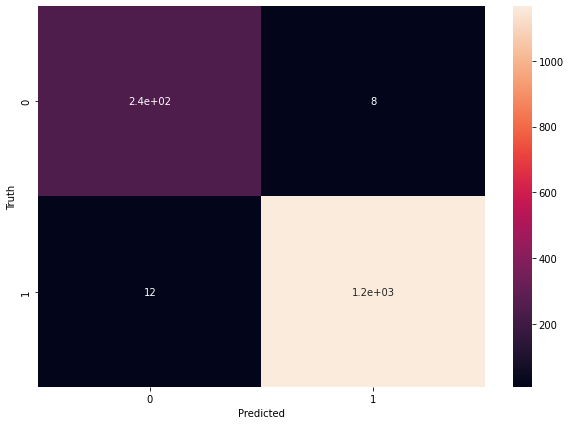

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
print(cm)
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('accuracy.png')


In [ ]:
#Precision,recall,f1_score,cohen_kappa_score,auc.......
print("Precision,recall,f1 score,cohen kappa score,auc.....")
print(" ")

# precision tp / (tp + fp)
precision = precision_score(y_test, y_predicted)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,y_predicted)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_predicted)
print('F1 score: %f' % f1)



Precision,recall,f1 score,cohen kappa score,auc.....
 
Precision: 0.993186
Recall: 0.989813
F1 score: 0.991497
